In [218]:
import matplotlib.pyplot as plt
plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"]=14
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.transparent"] = True
plt.rcParams["axes.spines.right"]=False
plt.rcParams["axes.spines.top"]=False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.1
import seaborn as sns
sns.set_palette("deep")
import numpy as np
import pandas as pd
from permutation_helpers import random_data_gen

from scipy.stats import norm
def auc_from_maha(maha_dist: float):
    # source: https://en.wikipedia.org/wiki/Sensitivity_index#RMS_sd_discriminability_index
    auc = norm.cdf(maha_dist / np.sqrt(2))
    return auc

maha_values = np.linspace(0., 1.5, 5)

In [188]:
np.linspace(0., 1.875, 6)

array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875])

### 2D Mahalanobis distance

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


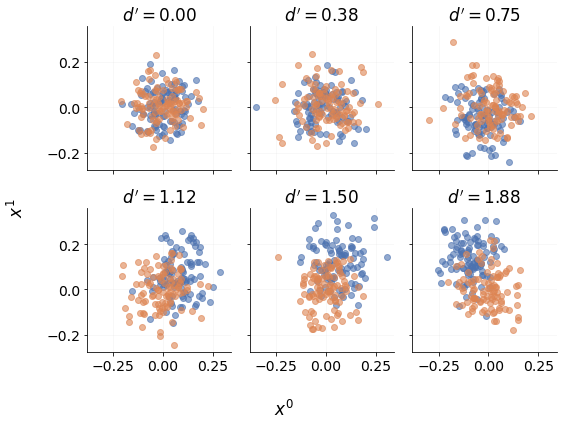

In [219]:
fig, ax = plt.subplots(2, 3, figsize=(8, 6), sharey=True, sharex=True)
ax = ax.ravel()
for i, m in enumerate(np.linspace(0., 1.875, 6)):
    X, y = random_data_gen(n_samples=200, n_feats=2, maha=m)
    ax[i].scatter(X[y, 0], X[y, 1], alpha=.6)
    ax[i].scatter(X[~y, 0], X[~y, 1], alpha=.6)
    ax[i].set_title(f"$d'={m:.2f}$")
fig.supxlabel(r"$x^0$")
fig.supylabel(r"$x^1$")
plt.tight_layout()
plt.savefig("2D_maha_viz.pdf", bbox_inches="tight")

In [196]:
pd.concat([maha_post, None])

,param,score,perm_scores,pval
0,0.01,0.583333,"[0.20833333333333334, 0.41666666666666663, 0.2...",0.347730
1,0.01,0.619048,"[0.5238095238095237, 0.8571428571428572, 0.523...",0.332134
2,0.01,0.190476,"[0.2857142857142857, 0.23809523809523808, 0.38...",0.936213
3,0.01,0.416667,"[0.2916666666666667, 1.0, 0.45833333333333337,...",0.643671
4,0.01,0.500000,"[0.0, 0.3125, 0.5, 0.0, 0.4375, 0.125, 0.9375,...",0.559288
...,...,...,...,...
2495,0.50,0.540424,"[0.5123969587835134, 0.5053861544617847, 0.522...",0.063387
2496,0.50,0.494246,"[0.4892036814725891, 0.5342456982793117, 0.494...",0.590282
2497,0.50,0.512592,"[0.5084160000000001, 0.534496, 0.4986399999999...",0.308938
2498,0.50,0.511720,"[0.49699995199923197, 0.4785356565705052, 0.51...",0.332334


In [258]:
testsize = None
for m in maha_values.round(2):
    testsize_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_testsize_post.pkl")
    testsize_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_testsize_pre.pkl")
    testsize_pre['type'] = "pre"; testsize_post['type'] = "post"
    testsize_pre['d'] = m; testsize_post['d'] = m
    testsize = pd.concat([testsize, testsize_pre, testsize_post])
testsize['positive'] = testsize['pval']<=.05
testsize['param'] = testsize['param'].round(3)

In [225]:
plt.legend?

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `.Axes.legend` without
any arguments and without setting 

<AxesSubplot:xlabel='d', ylabel='positive'>

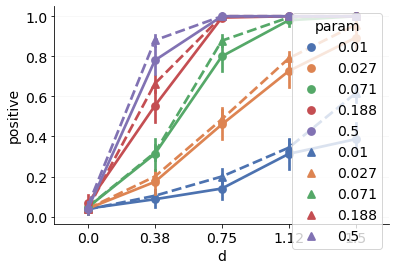

In [274]:
ax = sns.pointplot(data=testsize.query("type=='pre'"), x='d', y='positive', hue='param', height=3, aspect=.6, label='pre')
sns.pointplot(data=testsize.query("type=='post'"), x='d', y='positive', hue='param', markers='^', linestyles='--', ax=ax, label='post', legend=False)
# ax.legend(title="test/train split", loc="upper right", bbox_to_anchor=(1.4, 1))

In [72]:
maha_post.groupby("param").agg({"pval":("mean", "std"), "score":("mean", "std")})

pval               score          
           mean       std      mean       std
param                                        
0.000  0.503441  0.279188  0.499908  0.039318
0.375  0.068012  0.119325  0.586924  0.041559
0.750  0.000541  0.001864  0.688973  0.037712
1.125  0.000200  0.000000  0.776229  0.032772
1.500  0.000200  0.000000  0.844670  0.024719

In [73]:
maha_pre.groupby("param").agg({"pval":("mean", "std"), "score":("mean", "std")})

pval               score          
           mean       std      mean       std
param                                        
0.000  0.483709  0.287623  0.502463  0.041182
0.375  0.090907  0.128532  0.584389  0.041220
0.750  0.004687  0.012503  0.686396  0.035799
1.125  0.000857  0.001231  0.776063  0.031669
1.500  0.000465  0.000402  0.844230  0.025807

In [74]:
null_scores = maha_post.explode("perm_scores").groupby("param").agg({"perm_scores":("mean", "std")})

(array([16., 18., 14., 20., 12., 18., 13., 14., 11., 14.]),
 array([0.00359928, 0.10085983, 0.19812038, 0.29538092, 0.39264147,
        0.48990202, 0.58716257, 0.68442312, 0.78168366, 0.87894421,
        0.97620476]),
 <BarContainer object of 10 artists>)

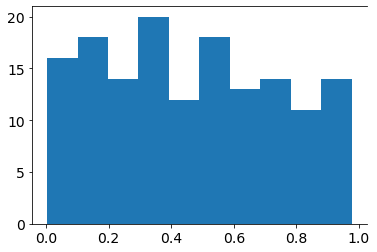

In [62]:
plt.hist(maha_pre[maha_pre.param==0.]['pval'])

In [33]:
(maha_pre[maha_pre.param==0.]['pval'] < .05).mean()

0.04

## Are we over-fitting or under-fitting?

In [103]:
maha = pd.concat([maha_post, maha_pre])
expected_auc = auc_from_maha(np.unique(maha["param"]))

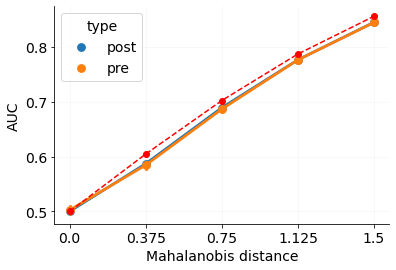

In [110]:
ax = sns.pointplot(data=maha, x="param", y="score", hue='type', label="Actual AUC")
ax.plot(expected_auc, color='red', ls='--', marker='o', label = "Expected AUC")
ax.set_xlabel("Mahalanobis distance")
ax.set_ylabel("AUC")
plt.grid(True, alpha=0.1)
# plt.legend()
# sns.pointplot(data=null_scores, x="param", y="mean")

(0.368359375, 1.0)

<Figure size 432x720 with 0 Axes>

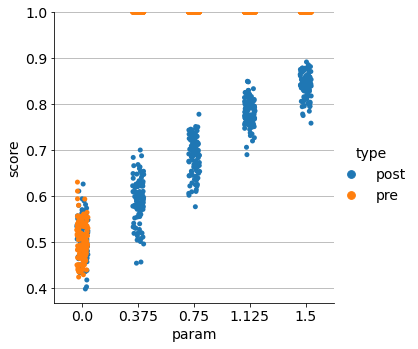

In [68]:
plt.figure(figsize=(6, 10))
sns.catplot(data=maha, x='param', y='score', hue="type", kind='strip')
plt.ylim(None, 1)

(0.0, 1.0)

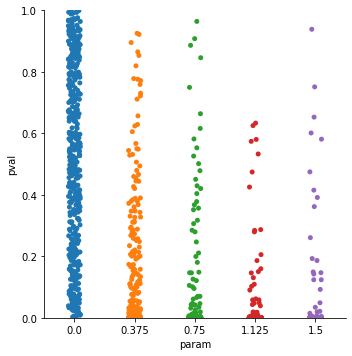

In [35]:
sns.catplot(data=maha_post, x='param', y='pval', kind='strip')
plt.ylim(0, 1)

<AxesSubplot:xlabel='param', ylabel='expected_auc'>

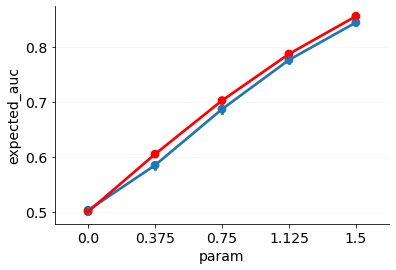

In [97]:
ax = sns.pointplot(data=maha_pre, x="param", y="score",)
sns.pointplot(data=maha_pre, x="param", y="expected_auc", ax=ax, color='red')

In [92]:
samplesize_post = pd.read_pickle("simulate_samplesize_post.pkl")
samplesize_post['type'] = 'post'
samplesize_pre = pd.read_pickle("simulate_samplesize_pre.pkl")
samplesize_pre['type'] = 'pre'
samplesize = pd.concat([samplesize_post, samplesize_pre]).reset_index(drop=True)

samplesize['pos'] = samplesize['pval']<=.05 

Text(0.5, 0, 'N samples')

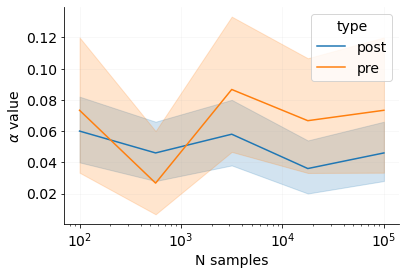

In [98]:
ax = sns.lineplot(data=samplesize, x="param", y="pos", hue='type')
plt.xscale("log")
plt.ylabel(r"$\alpha$ value")
plt.xlabel(r"N samples")

In [24]:
import time

In [25]:
time.strftime("%m%d%y_%H:%M")

'032023_14:25'

In [ ]:
samplesize